# Dataset: Marketing
----

Cada fila representa un encuestado, cada columna contiene atributos de este. 

La columna *y* indica si el encuestado acepto la oferta de marketing.

prospectos | atributos
:----:     | :----:
41128      | 21


## 1. Identificar el tipo/clase de problema

Dado el dataset obtenido queremos saber si futuros clientes aceptaran la encuesta de marketing. Para eso haremos uso de algoritmos de clasificacion. 

## 2. Identificar las variables y sus características. Describirlas.

|      Nombre     |                                                             Posibles valores                                                            |    Tipo    |                                                        Descripcion                                                       |
|:---------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|:----------:|:------------------------------------------------------------------------------------------------------------------------:|
| Age             | ( ... )                                                                                                                                 | Numerico   | Edad del encuestado                                                                                                      |
| Job             | ( housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student) | Categorico | Trabajo                                                                                                                  |
| Marital         | (married, single, divorced, unknown)                                                                                                    | Categorico | Estado civil                                                                                                             |
| Education       | (basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate)                                | Categorico | Nivel de Educacion Alcanzado                                                                                             |
| Default         | (no, yes, unknown)                                                                                                                      | Categorico | ¿Credito en default?                                                                                                     |
| Housing         | (no, yes, unknown)                                                                                                                      | Categorico | ¿Prestamo hipotecarios?                                                                                                  |
| Loan            | (no, yes, unknown)                                                                                                                      | Categorico | ¿Prestamo personal?                                                                                                      |
| Contact         | (telephone, cellular)                                                                                                                   | Categorico | Dispositivo de contacto                                                                                                  |
| Month           | (may, jun, jul, aug, oct, nov, dec, mar, apr, sep)                                                                                      | Categorico | Mes de contacto                                                                                                          |
| Day of the week | ( ... )                                                                                                                                 | Categorico   | Dia de contacto                                                                                                          |
| Duration        | ( ... )                                                                                                                                 | Numerico   | Duración en segundos del ultimo contacto                                                                                 |
| Campaign        | ( ... )                                                                                                                                 | Numerico   | Numero de contactos hechos en esta campaña para este clienteNumero de contactos hechos en esta campaña para este cliente |
| Pdays           | ( ... )                                                                                                                                 | Numerico   | Numero de días desde el ultimo contacto (999 si nunca ha sido contactado)                                                |
| Previous        | ( ... )                                                                                                                                 | Numerico   | Numero de contactos hechos en campañas anteriores                                                                        |
| POutcome        | (nonexistent, failure, success)                                                                                                         | Categorico | Resultado de la ultima campaña                                                                                           |
| emp.var.rate    | ( ... )                                                                                                                                 | Numerico   | Variacion del empleo trimestral                                                                                          |
| cons.price.idx  | ( ... )                                                                                                                                 | Numerico   | Indice de precios al consumidor mensual                                                                                  |
| cons.conf.idx   | ( ... )                                                                                                                                 | Numerico   | Indice de confianza del consumidor mensual                                                                               |
| euribor3m       | ( ... )                                                                                                                                 | Numerico   | Tipo europeo de oferta interbancaria (diario)                                                                            |
| nr.employed     | ( ... )                                                                                                                                 | Numerico   | Numero de empleados trimestral                                                                                           |
| y               | (no, yes)                                                                                                                               | Categorico | ¿El encuestado acepto la oferta?                                                                                         |

* Todas las variables categoricas son nominales, exceptuando outcome, education e 'y'.


## 3. Realizar la tarea de preprocesamiento en caso de que fuese necesario. Limpieza de variables, normalización, categorización, remuestreo, binarización, categorización, etc.

In [66]:
# Cargamos la data con panda. Panda nos facilita el cargado de data mixto (numerico y categorico)
# Referencia: https://stackoverflow.com/questions/11023411/how-to-import-csv-data-file-into-scikit-learn
import pandas as pd
dataset = pd.read_csv('./Marketing.csv', sep=';')
dataset.describe(include='all')

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Chequeamos que nuestro dataset no tenga valores nulos ni clientes duplicados
dataset.select_dtypes('object').info()
dataset.drop_duplicates(keep = False, inplace = True)
dataset.shape
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


(41164, 21)

In [68]:
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

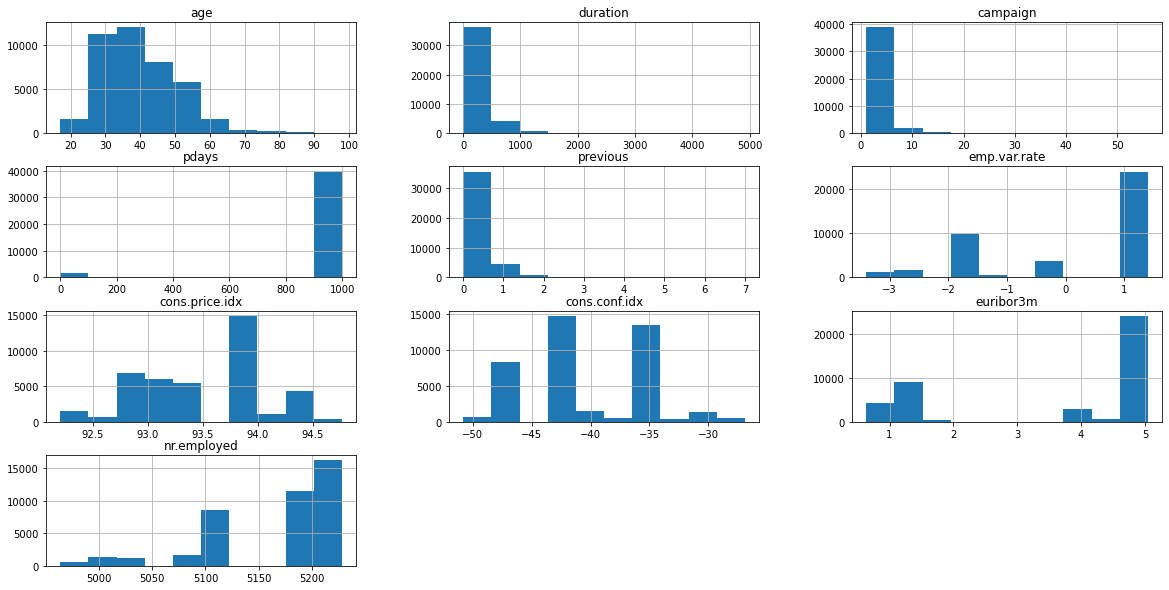

In [69]:
import matplotlib.pyplot as plt

dataset.hist(figsize=(20,10))
plt.show()

<AxesSubplot:>

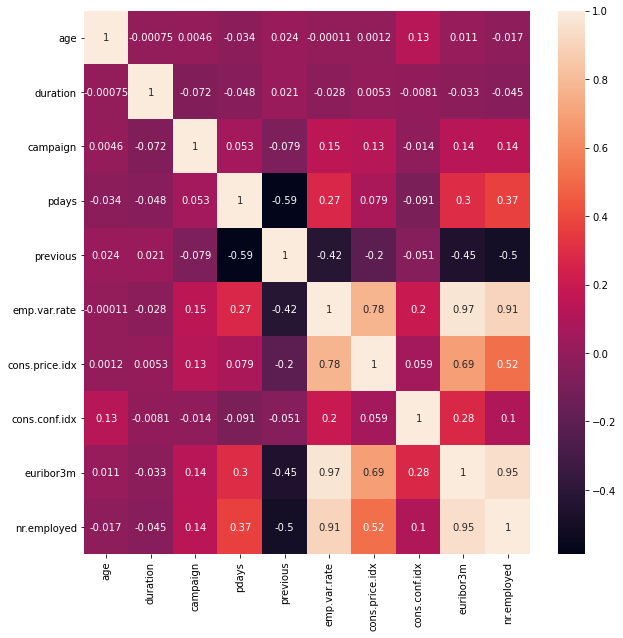

In [70]:
# Heatmap para describir la correlacion de variables
# Referencia: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax, annot=True)

In [71]:
from sklearn.preprocessing import LabelEncoder

# Necesitamos que todos nuestros datos sean numericos, asi que haremos uso de la tecnica de enconding
# Referencia: https://pbpython.com/categorical-encoding.html
# Podriamos realizar el encoding manualmente reemplazando valores, por simplicidad usaremos un algoritmo que lo haga por nosotros.

print(f"Categorias unicas por variable: \n{dataset.nunique()}")
dataset = pd.get_dummies(dataset, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

# LabelEnconder solo se usa para y, tal como indica la documentacion de scikit.
labelEncoder = LabelEncoder()
dataset['y'] = labelEncoder.fit_transform(dataset['y'])

dataset.head()

Categorias unicas por variable: 
age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


## 4. Aplicar al menos tres (3) modelos de Machine Learning distintos para el problema identificado.
* Formalizar una técnica de selección de los datos.
* Evaluar cada modelo según los resultados obtenidos.
* Comentar las ventajas y limitación de los modelos elegidos.

Aplicaremos los siguientes modelos:

1. Gradient Boosting Machines.
2. Neural Networks.
3. Regresion logistica.

### Split y escalada de datos

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

X = dataset.drop(columns = 'y',axis=1).values
y = dataset['y'].values

# Hacemos el split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Standard Scaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 1. Árboles de Decisión Aumentados por Gradiente (Gradient Boosting Machines)

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

# Primera corrida ingenua
gradient = GradientBoostingClassifier()
gradient.fit(X_train, y_train)

print(f'Accuracy en el training set: {gradient.score(X_train, y_train):.4f}')
print(f'Accuracy en el test set: {gradient.score(X_test, y_test):.4f}')


Accuracy en el training set: 0.9232
Accuracy en el test set: 0.9163


## 2. Redes Neuronales (Neural Networks)

In [76]:
from tensorflow import keras
from sklearn.metrics import accuracy_score
import numpy as np

np.random.seed(123)

print(dataset.shape)

# Referencia: https://keras.io/guides/sequential_model/
# Referencia: https://www.bmc.com/blogs/keras-neural-network-classification/
def get_classifier(optimizer='adam'):
    classifier = keras.models.Sequential()

    classifier.add(keras.layers.Dense(units=8,
                        activation='relu',
                        kernel_initializer='uniform',
                        input_dim=63))
    classifier.add(keras.layers.Dropout(rate=0.1))

    classifier.add(keras.layers.Dense(units=8,
                        activation='relu',
                        kernel_initializer='uniform'))
    classifier.add(keras.layers.Dropout(rate=0.1))

    classifier.add(keras.layers.Dense(units=1,
                        activation='sigmoid',
                        kernel_initializer='uniform'))

    classifier.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return classifier

classifier = get_classifier()
history = classifier.fit(x=X_train, y=y_train, batch_size=64, epochs=50, validation_split=0.1)
score = classifier.evaluate(X_test, y_test, verbose=0) 

history.history['accuracy']
print(f'\nAccuracy en el test set: {score[1]:.4f}')

(41164, 64)
Epoch 1/50
464/464 [==============================] - 1s 808us/step - loss: 0.3389 - accuracy: 0.8863 - val_loss: 0.2153 - val_accuracy: 0.8934
Epoch 2/50
464/464 [==============================] - 0s 599us/step - loss: 0.2121 - accuracy: 0.8866 - val_loss: 0.1972 - val_accuracy: 0.8934
Epoch 3/50
464/464 [==============================] - 0s 596us/step - loss: 0.1994 - accuracy: 0.8866 - val_loss: 0.1922 - val_accuracy: 0.8934
Epoch 4/50
464/464 [==============================] - 0s 606us/step - loss: 0.1958 - accuracy: 0.9016 - val_loss: 0.1886 - val_accuracy: 0.9010
Epoch 5/50
464/464 [==============================] - 0s 594us/step - loss: 0.1939 - accuracy: 0.9096 - val_loss: 0.1868 - val_accuracy: 0.9047
Epoch 6/50
464/464 [==============================] - 0s 603us/step - loss: 0.1925 - accuracy: 0.9112 - val_loss: 0.1843 - val_accuracy: 0.9056
Epoch 7/50
464/464 [==============================] - 0s 610us/step - loss: 0.1919 - accuracy: 0.9111 - val_loss: 0.1843 - v

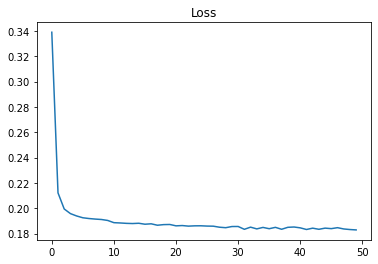

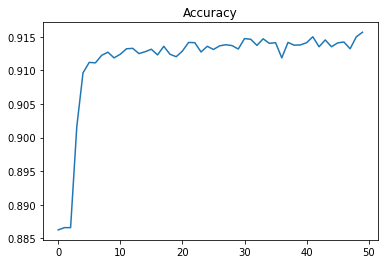

In [77]:
def plot_history(history):
    plt.plot(np.arange(0,len(history.history['loss'])), history.history['loss'])
    plt.title("Loss")
    plt.show()
    plt.plot(np.arange(0,len(history.history['accuracy'])), history.history['accuracy'])
    plt.title("Accuracy")
    plt.show()

plot_history(history)

In [79]:
# 3.Regresion Logistica

In [80]:
from sklearn.linear_model import LogisticRegression

# Primera corrida ingenua
logistic = LogisticRegression(random_state=22, solver='saga')
logistic.fit(X_train, y_train)

print(f'La precision del entrenamiento es {logistic.score(X_train, y_train):.4f}')
print(f'La precision del test es {logistic.score(X_test, y_test):.4f}')

La precision del entrenamiento es 0.9108
La precision del test es 0.9122
